### <center> Basic Finance using Pandas </center>
    
        This tutorial covers topics covered by :
        
        

        
        This notebook covers the following topics :
        
        SECTION I : 
        
        1. Importing data from an API vs csv file
        2. Calculating Simple vs Log Returns
        3. Calculating Portfolio Return
        4. Calculating return on an index
        5. Correlation between Stocks
        
        SECTION II :
        
        5. Time Value of Money
        6. Linear Regression 
        7. CAPM
        8. Monte Carlo Simulation
        
        
        

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

> ### Importing data from an API vs csv file

In [5]:

# Import data from yahoo API
COP = wb.DataReader('COP',data_source="yahoo",start="1995-01-01")
COP.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-22,63.799999,62.830002,63.799999,63.009998,6755800.0,63.009998
2020-01-23,63.360001,61.619999,62.009998,63.139999,6199900.0,63.139999
2020-01-24,62.700001,62.049999,62.700001,62.619999,5689500.0,62.619999
2020-01-27,61.830002,60.840000,61.369999,61.040001,7321100.0,61.040001
2020-01-28,61.680000,60.900002,61.610001,61.180000,4000310.0,61.180000


> ### Simple Returns vs Log Returns

    Simple Returns are used when dealing with multiple assets over the same timeframe.
    
    Equation here
   

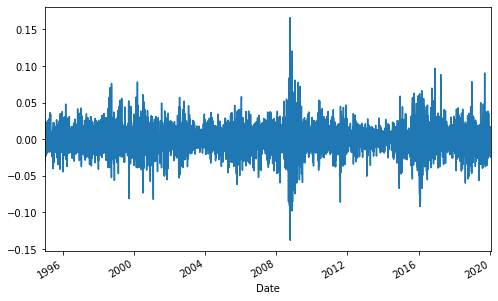

In [6]:
(COP
 .assign(SimpleReturn = lambda df_ :(df_['Adj Close']/df_['Adj Close'].shift(1))-1)
 .SimpleReturn
 .plot(figsize=(8,5))
)

> Logarithmic Rate of Return
    
    Logarithmic Rate of Return is used when you make calculations about a single asset over time.
    
    $$ln(Pt/P_t-1)$$

In [63]:

(COP
 .assign(LogReturn = lambda df_ :(np.log(df_['Adj Close']/df_['Adj Close'].shift(1))))
 .LogReturn
 #.plot(figsize=(8,5))
 .mean()
)


0.0004631569052903974

In [55]:
# Alternative way to get the same; But be careful when using np.diff() with prices or rates that can be negative
(COP
 .assign(LogReturn = lambda df_ :(np.log(df_['Adj Close']).diff()))
 .LogReturn
 #.plot(figsize=(8,5))
 .mean()
)

0.0004631569052903984

> ### Calculating the Rate of Return on a Portfolio

    Now lets calculate the rate of return on a portfolio : 
    Our portfolio consists of 4 stocks : 

    AAP (Advance Auto Parts) 
    CI (Cigna) 
    ALXN (Alexion Pharmaceuticals) 
    LHX (L3Harris Technologies)

    Historical Rate of Return = E1*w1 + E2*w2 + E3*w3 + E4*w4
    
    where E and w are the expected return on each of the individual stock and w is the weight of each stock in the portfolio

In [8]:
portfolio_tickers = ['AAP','CI','ALXN','LHX']
my_df = pd.DataFrame()
for i in portfolio_tickers:
    my_df[i] = wb.DataReader(i,data_source="yahoo",start="1995-1-1")['Adj Close']    

In [9]:
my_df.head()

,AAP,CI,ALXN,LHX
Date,,,,
2001-11-29,13.202953,28.089981,5.4000,10.537917
2001-11-30,13.570758,28.111553,5.3325,10.534613
2001-12-03,13.110998,28.086893,5.3475,10.419030
2001-12-04,12.587828,28.194754,5.4350,10.646895
2001-12-05,13.951244,28.086893,5.7750,10.745962


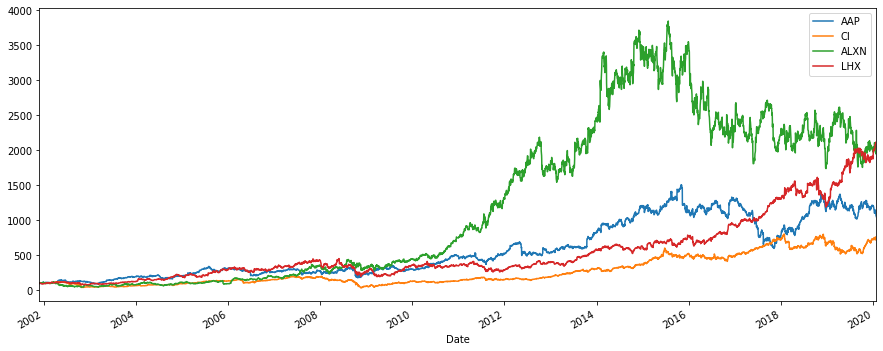

In [10]:
(my_df/my_df.iloc[0] *100).plot(figsize=(15,6))

In [11]:
# Lets evaluate simple return of all the stocks from the historical data
ind_return = my_df/my_df.shift(1) - 1
ind_return

# But, we are more interested in the average return
annual_return = ind_return.mean() * 250
annual_return

AAP     0.179927
CI      0.175811
ALXN    0.255063
LHX     0.211464
dtype: float64

In [12]:
weights = np.array([0.25,0.25,0.25,0.25])
print(weights)

portfolio_return = str(np.round(np.dot(annual_return,weights),6) * 100) + '%'
portfolio_return

[0.25 0.25 0.25 0.25]


'20.5566%'

> ### Calculating return on a index (Example : DOWJONES, NASDAQ)

    The three most widely followed indexes in the U.S. are the S&P 500, Dow Jones Industrial Average, and Nasdaq Composite.The Wilshire 5000 includes all the stocks from the U.S. stock market.
    
    FTSE : UK
    DAX 30 : Germany
    NIKKEI : Japan
    SSE : China 
    
    Reference :
    

In [42]:
index_tickers = ['^GSPC','^IXIC','^GDAXI','^N225']
index_df = pd.DataFrame()

for i in index_tickers:
    index_df[i] = wb.DataReader(i,data_source="yahoo",start="1997-2-1")['Adj Close']
    
print(index_df.head())
    
index_return = (index_df/index_df.shift(1) - 1)
annual_index_return = index_return.mean() * 250
annual_index_return

                 ^GSPC        ^IXIC       ^GDAXI         ^N225
Date                                                          
1997-02-03  786.729980  1376.050049  3064.699951  18085.949219
1997-02-04  789.260010  1373.750000  3067.479980  18314.330078
1997-02-05  778.280029  1348.439941  3114.729980  18185.970703
1997-02-06  780.150024  1346.400024  3124.780029  18038.429688
1997-02-07  789.559998  1357.709961  3161.360107  17867.039062


^GSPC     0.079360
^IXIC     0.112870
^GDAXI    0.075833
^N225    -0.001325
dtype: float64

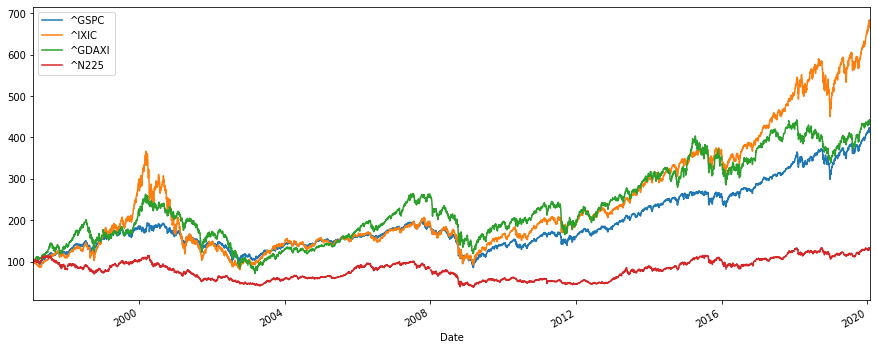

In [14]:
(index_df/index_df.iloc[0] *100).plot(figsize=(15,6))

> ### Correlation between Stocks

    For more info on the offsets available in resample() : Refer 
    
    https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
    
    Search Keyword : "available date offsets"

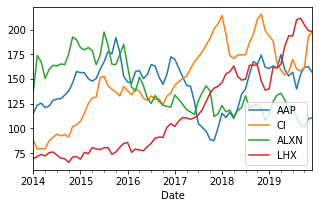

In [74]:
# Load data from yahoo API
data_corr = pd.DataFrame()
for i in portfolio_tickers:
    data_corr[i] = wb.DataReader(i,data_source="yahoo",start="2014-01-01",end="2019-12-31")['Close']
    

# Visual inspection of the stocks
(data_corr
 .resample('BM')
 .mean().round(2)
 .plot(figsize=(5, 3))
)

In [76]:
# Lets calculate the return of the
temp_df = data_corr.resample('BM').last()

return_df = pd.DataFrame()
for month in temp_df:
    if month not in return_df:
        return_df[portfolio_tickers] = np.log(temp_df[portfolio_tickers]).diff()

print(return_df.head())

# Calculating correlation between columns
return_df.corr()

                 AAP        CI      ALXN       LHX
Date                                              
2014-01-31       NaN       NaN       NaN       NaN
2014-02-28  0.103739 -0.081057  0.107815  0.062608
2014-03-31 -0.006775  0.050709 -0.150284 -0.008981
2014-04-30 -0.042058 -0.045071  0.039125  0.004909
2014-05-30  0.023467  0.114836  0.050054  0.049489


,AAP,CI,ALXN,LHX
AAP,1.000000,0.110953,0.086884,0.135685
CI,0.110953,1.000000,0.225072,0.160594
ALXN,0.086884,0.225072,1.000000,0.168119
LHX,0.135685,0.160594,0.168119,1.000000


> #### Calculating Risk on a security

> Formula for Future Value :

    Future Value is given by,
$$FV = PV (1 + r)^T$$

In [15]:
# Time Value of money; Calculating Future Value
PV = 1000
r = 0.08
T = 2
FV = PV * (1 + r)**T

"$" + str(np.round(FV,2))

'$1166.4'